In [10]:
import torch
import matplotlib.pyplot as plt

qat_acc = []
qavat_acc = []
noise_list = (0.2,0.4,0.6,0.8,1.0)
for noise in noise_list:
    basemodel = 'testResult_noise%.4f_LeNet_A1W1_noise0.0.ckpt'%(noise)
    VAmodel = 'testResult_noise%.4f_LeNet_A1W1_noise%s.ckpt'%(noise,noise)
    basemodel_res = torch.load(basemodel)
    VAmodel_res = torch.load(VAmodel)
    print("noise %s"%noise)
    print("QAT %.4f"%(basemodel_res['mean_acc']))
    print("QAT+VAT %.4f"%(VAmodel_res['mean_acc']))
    print("")
    qat_acc.append(basemodel_res['mean_acc'])
    qavat_acc.append(VAmodel_res['mean_acc'])

noise 0.2
QAT 0.9746
QAT+VAT 0.9750

noise 0.4
QAT 0.9600
QAT+VAT 0.9666

noise 0.6
QAT 0.9081
QAT+VAT 0.9503

noise 0.8
QAT 0.7835
QAT+VAT 0.9287

noise 1.0
QAT 0.6020
QAT+VAT 0.8951



In [15]:
plt.rcParams.update({'font.size': 14})

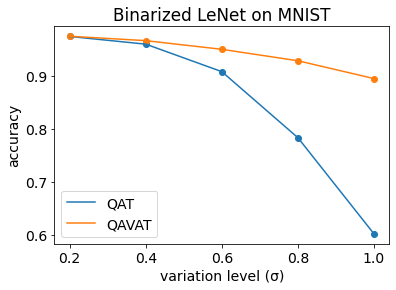

In [18]:
plt.plot(noise_list,qat_acc,label='QAT')
plt.scatter(noise_list,qat_acc)
plt.plot(noise_list,qavat_acc,label='QAVAT')
plt.scatter(noise_list,qavat_acc)
plt.title('Binarized LeNet on MNIST')
plt.xlabel('variation level (\u03C3)')
plt.ylabel('accuracy')
plt.legend()
plt.savefig('LeNet.pdf')
plt.show()